<a href="https://colab.research.google.com/github/Mancykaur/branching2/blob/master/soft_computing_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***1.Program to implement a Genetic Algorithm.***

In [ ]:
import random

#Step 1: Initialization

def initialize_population (pop_size, chromosome_length):
    population = []
    for _ in range(pop_size):
        chromosome = ''.join(random.choice('01') for _ in range(chromosome_length))
        population.append(chromosome)
    return population

#Step 2: Fitness Function

def fitness (chromosome):
   return sum(int (gene) for gene in chromosome)

#Step 3: Selection

def selection (population, fitnesses):
    total_fitness = sum (fitnesses)
    probabilities = [f/total_fitness for f in fitnesses]
    selected_indices =random.choices (range (len(population)), probabilities, k=2)
    return population [selected_indices [0]], population [selected_indices[1]]

# Parameters

population_size = 10
chromosome_length = 8

#Generate initial population.

population = initialize_population (population_size, chromosome_length)

#Calculate fitness for each chromosome in the population

fitnesses = [fitness (chromosome) for chromosome in population]

#Perform selection

parent1, parent2 = selection(population, fitnesses)

#Display initial population, fitnesses, and selected parents print("Initial Population:")

for i, chromosome in enumerate (population):
    print (f"Chromosome (i+1): (chromosome), Fitness: {fitnesses [i]}")

print("\nSelected Parents:")

print(f"Parent 1: (parent1), Fitness: {fitness (parent1)}")
print (f"Parent 2: (parent2), Fitness: {fitness (parent2)}")

Chromosome (i+1): (chromosome), Fitness: 3
Chromosome (i+1): (chromosome), Fitness: 3
Chromosome (i+1): (chromosome), Fitness: 6
Chromosome (i+1): (chromosome), Fitness: 6
Chromosome (i+1): (chromosome), Fitness: 4
Chromosome (i+1): (chromosome), Fitness: 2
Chromosome (i+1): (chromosome), Fitness: 7
Chromosome (i+1): (chromosome), Fitness: 4
Chromosome (i+1): (chromosome), Fitness: 4
Chromosome (i+1): (chromosome), Fitness: 4

Selected Parents:
Parent 1: (parent1), Fitness: 6
Parent 2: (parent2), Fitness: 4


***2. program to implement genetic alorithm Using crossover and mutation.***

In [ ]:

import random

# initialization
def initialize_population(population_size, chromosome_length):
    population = []
    for _ in range(population_size):
        chromosome = ''.join(random.choice('01') for _ in range(chromosome_length))
        population.append(chromosome)
    return population

population_size = 10
chromosome_length = 8
initial_population = initialize_population(population_size, chromosome_length)
print("initial inpopulation:")
for i, chromosome in enumerate(initial_population):
        print(f"Chromosome {i + 1}: {chromosome}")

initial inpopulation:
Chromosome 1: 11101101
Chromosome 2: 00001001
Chromosome 3: 01001101
Chromosome 4: 00110000
Chromosome 5: 00010001
Chromosome 6: 01100110
Chromosome 7: 01000011
Chromosome 8: 10011100
Chromosome 9: 10110010
Chromosome 10: 00011100


In [ ]:
def initialize_population(pop_size, chromosome_length):
  population = []
  for _ in range(pop_size):
    chromosome = ''.join(random.choice('01') for _ in range(chromosome_length))
    population.append(chromosome)
  return population

def fitness(chromosome):
  return sum(int(gene) for gene in chromosome)

def selection(population, fitnesses):
  total_fitness = sum(fitnesses)
  probabilities = [f / total_fitness for f in fitnesses]
  selected_indices = random.choices(range(len(population)), probabilities, k=2)
  return population[selected_indices[0]], population[selected_indices[1]]

def single_point_crossover(parent1, parent2):
  crossover_point = random.randint(1, len(parent1) - 1)
  offspring1 = parent1[:crossover_point] + parent2[crossover_point:]
  offspring2 = parent2[:crossover_point] + parent1[crossover_point:]
  return offspring1, offspring2

def mutate(chromosome, mutation_rate):
  mutated_chromosome = ''.join( gene if random.random() > mutation_rate else random.choice('01') for gene in chromosome)
  return mutated_chromosome



def genetic_algorithm(pop_size, chromosome_length, generations, crossover_rate, mutation_rate):
    population = initialize_population(pop_size, chromosome_length)

    for generation in range(generations):

        fitnesses = [fitness(chromosome) for chromosome in population]

        next_population = []
        while len(next_population) < pop_size:
            # Selection
            parent1, parent2 = selection(population, fitnesses)

            if random.random() < crossover_rate:
                offspring1, offspring2 = single_point_crossover(parent1, parent2)
            else:
                offspring1, offspring2 = parent1, parent2

            offspring1 = mutate(offspring1, mutation_rate)
            offspring2 = mutate(offspring2, mutation_rate)

            next_population.extend([offspring1, offspring2])

    population = next_population[:pop_size]

    best_fitness = max(fitnesses)
    print(f"Generation {generation + 1}: Best Fitness = {best_fitness}")

    fitnesses = [fitness(chromosome) for chromosome in population]
    best_chromosome = population[fitnesses.index(max(fitnesses))]
    return best_chromosome, max(fitnesses)


#parameters
population_size = 10
chromosome_length = 8
generations = 20
crossover_rate = 0.7
mutation_rate = 0.01


best_chromosome, best_fitness = genetic_algorithm(population_size, chromosome_length, generations, crossover_rate, mutation_rate)
print(f"\nBest Chromosome: {best_chromosome} with Fitness: {best_fitness}")


Generation 20: Best Fitness = 7

Best Chromosome: 11011111 with Fitness: 7


***3.Program to implement particle Swarm optimiation (PSO) Algorithm***

In [ ]:
import numpy as np
def objective_function(x):
    return np.sum(x**2)

def particle_swarm_optimization(obj_func, bonds, num_particles=30, max_iter=100, w=0.5, c1=1.5, c2=1.5):
  num_dimensions = len(bounds)
  positions = np.random.rand(num_particles, num_dimensions)
  positions = bounds[:,0] + positions * (bounds[:,1] - bounds[:,0])
  velocities = np.zeros_like(positions)
  personal_best_positions = positions.copy()
  personal_best_values = np.apply_along_axis(obj_func, 1, personal_best_positions)
  global_best_position = personal_best_positions[np.argmin(personal_best_values)]

  for _ in range(max_iter):
    r1, r2 = np.random.rand(num_particles, num_dimensions), np.random.rand(num_particles, num_dimensions)
    velocities = w * velocities + c1 * r1 * (personal_best_positions - positions) + c2 * r2 * (global_best_position - positions)
    positions = np.clip(positions + velocities, bounds[:,0], bounds[:,1])
    currents_values = np.apply_along_axis(obj_func, 1, positions)
    better_mask = currents_values < personal_best_values
    personal_best_positions[better_mask] = positions[better_mask]
    personal_best_values[better_mask] = currents_values[better_mask]
    global_best_position = personal_best_positions[np.argmin(personal_best_values)]

  return global_best_position, obj_func(global_best_position)

bounds = np.array([[-10, 10], [-10, 10]])

best_position, best_value = particle_swarm_optimization(objective_function, bounds)
print("best position found:", best_position)
print("best value found:", best_value)

best position found: [2.50523046e-12 9.32071727e-13]
best value found: 7.144937340916674e-24


Solution: [-3.14148391e-09  1.37687477e-08]
Fitness: 3.907985046680551e-14


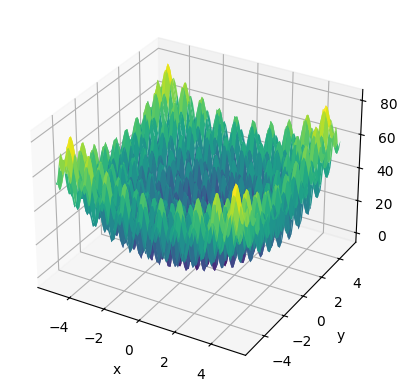

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the Rastrigin function
def rastrigin(x):
    n = len(x)
    return 10*n + sum([xi**2 - 10*np.cos(2*np.pi*xi) for xi in x])

# Define the PSO algorithm
def pso(cost_func, dim=2, num_particles=30, max_iter=100, w=0.5, c1=1, c2=2):
    # Initialize particles and velocities
    particles = np.random.uniform(-5.12, 5.12, (num_particles, dim))
    velocities = np.zeros((num_particles, dim))

    # Initialize the best positions and fitness values
    best_positions = np.copy(particles)
    best_fitness = np.array([cost_func(p) for p in particles])
    swarm_best_position = best_positions[np.argmin(best_fitness)]
    swarm_best_fitness = np.min(best_fitness)

    # Iterate through the specified number of iterations, updating the velocity and position of each particle at each iteration
    for i in range(max_iter):
        # Update velocities
        r1 = np.random.uniform(0, 1, (num_particles, dim))
        r2 = np.random.uniform(0, 1, (num_particles, dim))
        velocities = w * velocities + c1 * r1 * (best_positions - particles) + c2 * r2 * (swarm_best_position - particles)

        # Update positions
        particles += velocities

        # Evaluate fitness of each particle
        fitness_values = np.array([cost_func(p) for p in particles])

        # Update best positions and fitness values
        improved_indices = np.where(fitness_values < best_fitness)
        best_positions[improved_indices] = particles[improved_indices]
        best_fitness[improved_indices] = fitness_values[improved_indices]
        if np.min(fitness_values) < swarm_best_fitness:
            swarm_best_position = particles[np.argmin(fitness_values)]
            swarm_best_fitness = np.min(fitness_values)

    # Return the best solution found by the PSO algorithm
    return swarm_best_position, swarm_best_fitness

# Define the dimensions of the problem
dim = 2

# Run the PSO algorithm on the Rastrigin function
solution, fitness = pso(rastrigin, dim=dim)

# Print the solution and fitness value
print('Solution:', solution)
print('Fitness:', fitness)

# Create a meshgrid for visualization
x = np.linspace(-5.12, 5.12, 100)
y = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x, y)
Z = rastrigin([X, Y])

# Create a 3D plot of the Rastrigin function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Plot the solution found by the PSO algorithm
ax.scatter(solution[0], solution[1], fitness, color='red')
plt.show()


***4.Program to implement simple nural network***

In [ ]:
import numpy as np
from typing import List

class SimpleNeuralNetwork:
    def __init__(self, input_size=2, hidden_size=2, output_size=1):
        #Initialize weights and biases.
        self.W1 = np.random.rand(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.rand(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))

    def sigmoid(self, x):
       return 1/(1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def fit(self, X: List[List[float]], y: List[int], epochs: int, learning_rate: float) -> None:
        X = np.array (X)
        y = np.array(y).reshape(-1, 1)

        for epoch in range(epochs):
            #Forward pass
            hidden_input = np.dot(X, self.W1) + self.b1
            hidden_output = self.sigmoid(hidden_input)
            final_input = np.dot (hidden_output, self.W2) + self.b2
            final_output = self.sigmoid(final_input)

            #Calculate the error
            error = y - final_output

            #Backpropagation.
            d_final_output = error * self.sigmoid_derivative(final_output)
            d_hidden_output = d_final_output.dot (self.W2.T) * self.sigmoid_derivative(hidden_output)

            #Update weights and biases.
            self.W1 += X.T.dot(d_hidden_output) * learning_rate
            self.b1 += np.sum(d_hidden_output, axis=0, keepdims=True) * learning_rate
            self.W2 += hidden_output.T.dot(d_final_output) * learning_rate
            self.b2 += np. sum(d_final_output, axis=0, keepdims=True) * learning_rate

    def predict(self, X: List[List[ float]])-> List[int]:
      X = np.array(X)
      #Forward pass to predict
      hidden_input = np.dot(X, self.W1) + self.b1
      hidden_output = self.sigmoid(hidden_input)
      final_input = np.dot (hidden_output, self.W2) + self.b2
      final_output = self.sigmoid(final_input)

     #Convert probabilities to class labels (0 or 1)
      predictions = (final_output> 0.5).astype(int)
      return predictions.flatten().tolist()

#Example usage

x = [[0.5, 1.5], [1.0, 2.0], [1.5, 1.0], [2.0, 1.5]]
y = [0, 0, 1, 1]
epochs = 1000
learning_rate = 0.01

nn = SimpleNeuralNetwork()
nn.fit(x, y, epochs, learning_rate)
predictions = nn.predict(x)

print("Predictions:", predictions)

Predictions: [0, 1, 1, 1]


***5.Program to implement Ant colony optimiation***

In [4]:
import random
import math
import numpy as np

class AntColony:
    def __init__(self, distance_matrix, n_ants, n_best, n_iterations, decay, alpha=1, beta=1):
        self.distance_matrix = distance_matrix
        self.n_ants = n_ants
        self.n_best = n_best
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha  # Importance of pheromone
        self.beta = beta  # Importance of distance
        self.n_cities = len(distance_matrix)

        # Pheromone matrix initialization
        self.pheromone = np.ones((self.n_cities, self.n_cities)) / self.n_cities

    def run(self):
        shortest_path = None
        shortest_distance = float('inf')
        for _ in range(self.n_iterations):
            all_paths = self.gen_all_paths()
            self.spread_pheromone(all_paths, shortest_path)
            shortest_path, shortest_distance = self.get_shortest_path(all_paths, shortest_path, shortest_distance)
            self.pheromone *= (1 - self.decay)  # Pheromone evaporation

        return shortest_path, shortest_distance

    def spread_pheromone(self, all_paths, shortest_path):
        if shortest_path:
            pheromone_contribution = 1.0 / shortest_path[1]
            for move in shortest_path[0]:
                self.pheromone[move[0]][move[1]] += pheromone_contribution
    def get_shortest_path(self, all_paths, shortest_path, shortest_distance):
        for path, dist in all_paths:
            if dist < shortest_distance:
                shortest_distance = dist
                shortest_path = (path, dist)
        return shortest_path, shortest_distance

    def gen_path(self):
        path = []
        visited = set()
        current_city = random.randint(0, self.n_cities - 1)
        visited.add(current_city)

        for _ in range(self.n_cities - 1):
            next_city = self.select_next_city(current_city, visited)
            path.append((current_city, next_city))
            visited.add(next_city)
            current_city = next_city
        return path
    def select_next_city(self, current_city, visited):
        probabilities = []
        for city in range(self.n_cities):
            if city not in visited:
                pheromone = self.pheromone[current_city][city] ** self.alpha
                distance = self.distance_matrix[current_city][city] ** self.beta
                prob = pheromone / distance
                probabilities.append((city, prob))

        if not probabilities:
            return random.choice([i for i in range(self.n_cities) if i not in visited])

        total = sum([prob for _, prob in probabilities])
        probabilities = [(city, prob / total) for city, prob in probabilities]


        selected_city = random.choices([city for city, _ in probabilities], weights=[prob for _, prob in probabilities])[0]
        return selected_city
    def gen_all_paths(self):
        all_paths = []
        for _ in range(self.n_ants):
            path = self.gen_path()
            distance = self.calculate_path_distance(path)
            all_paths.append((path, distance))
        return all_paths
    def calculate_path_distance(self, path):
        distance = 0
        for move in path:
            distance += self.distance_matrix[move[0]][move[1]]
        return distance
# Example usage with a small TSP instance (4 cities)
distance_matrix = [
    [0, 10, 15, 20],
    [10, 0, 35, 25],
    [15, 35, 0, 30],
    [20, 25, 30, 0]
]

aco = AntColony(distance_matrix, n_ants=10, n_best=5, n_iterations=100, decay=0.95)
best_path, best_distance = aco.run()

print("Best Path:", best_path)
print("Best Distance:", best_distance)


Best Path: ([(3, 1), (1, 0), (0, 2)], 50)
Best Distance: 50


***6.Program to implement Multilayer Neural network***

In [9]:
import numpy as np
# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))[[]]
# Derivative of sigmoid
def sigmoid_derivative(x):
    return x * (1 - x)
# Initialize the neural network
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Set the sizes of the layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        # Initialize weights and biases
        self.weights_input_hidden = np.random.rand(self.input_size, self.hidden_size)
        self.weights_hidden_output = np.random.rand(self.hidden_size, self.output_size)
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.bias_output = np.zeros((1, self.output_size))
    def forward(self, X):
        # Forward pass: Input -> Hidden -> Output
        self.input = X
        self.hidden_input = np.dot(self.input, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = sigmoid(self.hidden_input)
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.output = sigmoid(self.output_input)
        return self.output
    def backward(self, X, y, learning_rate):
        # Backpropagation: Compute gradients and update weights and biases
        output_error = y - self.output  # Error at output
        output_delta = output_error * sigmoid_derivative(self.output)
        hidden_error = output_delta.dot(self.weights_hidden_output.T)  # Error at hidden lay
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_output)
        # Update weights and biases
        self.weights_hidden_output += self.hidden_output.T.dot(output_delta) * learning_rate
        self.weights_input_hidden += X.T.dot(hidden_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate
    def train(self, X, y, epochs, learning_rate):
        # Training loop
        for epoch in range(epochs):
            self.forward(X)
            self.backward(X, y, learning_rate)
            if epoch % 1000 == 0:
                loss = np.mean(np.square(y - self.output))  # Mean squared error
                print(f"Epoch {epoch}, Loss: {loss}")
   # Example Usage
if __name__ == "__main__":
    # Define dataset (X: inputs, y: expected outputs)
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # XOR problem
    y = np.array([[0], [1], [1], [0]])  # XOR output
    # Initialize neural network with 2 input neurons, 4 hidden neurons, and 1 output neuron
    nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1)
    # Train the neural network
    nn.train(X, y, epochs=10000, learning_rate=0.1)
    # Test the neural network
    print("Test Output:")
    print(nn.forward(X))

Epoch 0, Loss: 0.29763222981192894
Epoch 1000, Loss: 0.2418695727173955
Epoch 2000, Loss: 0.19171514940770493
Epoch 3000, Loss: 0.1018325408160654
Epoch 4000, Loss: 0.031264335790730444
Epoch 5000, Loss: 0.013655445800799377
Epoch 6000, Loss: 0.007973781716311107
Epoch 7000, Loss: 0.005426250077269088
Epoch 8000, Loss: 0.004036446081573171
Epoch 9000, Loss: 0.003178952258847439
Test Output:
[[0.05749779]
 [0.95172004]
 [0.95199732]
 [0.04974926]]


In [1]:
import random

def f(x):
    # Example function to maximize (can be replaced with any other function)
    return -1 * (x - 5)**2 + 25  # Maximum at x = 5

# Step 1: Initialization
def initialize_population(pop_size, x_min, x_max):
    # Generate a population of random integers in the range (x_min, x_max]
    return [random.randint(x_min + 1, x_max) for _ in range(pop_size)]

# Step 2: Fitness Evaluation
def evaluate_population(population):
    # Compute fitness for each individual
    return [f(x) for x in population]

# Step 3: Selection (Roulette Wheel Selection)
def select_parent(population, fitnesses):
    total_fitness = sum(fitnesses)
    probabilities = [fitness / total_fitness for fitness in fitnesses]
    cumulative_probs = [sum(probabilities[:i+1]) for i in range(len(probabilities))]
    r = random.random()
    for i, cumulative_prob in enumerate(cumulative_probs):
        if r <= cumulative_prob:
            return population[i]

# Step 4: Crossover (Single-point crossover)
def crossover(parent1, parent2):
    # Midpoint crossover
    return (parent1 + parent2) // 2

# Step 5: Mutation
def mutate(x, x_min, x_max, mutation_rate):
    if random.random() < mutation_rate:
        # Add a random small value to x, keeping it within bounds
        x += random.randint(-1, 1)
        return max(x_min + 1, min(x, x_max))
    return x

# Genetic Algorithm
def genetic_algorithm(x_min, x_max, population_size, generations, mutation_rate):
    # Step 1: Initialize population
    population = initialize_population(population_size, x_min, x_max)

    for generation in range(generations):
        # Step 2: Evaluate fitness
        fitnesses = evaluate_population(population)

        # Step 3: Create new population
        new_population = []
        while len(new_population) < population_size:
            # Select parents
            parent1 = select_parent(population, fitnesses)
            parent2 = select_parent(population, fitnesses)

            # Perform crossover
            offspring = crossover(parent1, parent2)

            # Perform mutation
            offspring = mutate(offspring, x_min, x_max, mutation_rate)

            new_population.append(offspring)

        # Update population
        population = new_population

        # Track the best solution in the current generation
        best_fitness = max(fitnesses)
        best_x = population[fitnesses.index(best_fitness)]
        print(f"Generation {generation + 1}: Best Fitness = {best_fitness}, Best x = {best_x}")

    # Final evaluation
    fitnesses = evaluate_population(population)
    best_fitness = max(fitnesses)
    best_x = population[fitnesses.index(best_fitness)]

    return best_x, best_fitness

# Parameters
x_min = 0
x_max = 10
population_size = 10
generations = 20
mutation_rate = 0.1

# Run the Genetic Algorithm
best_x, best_fitness = genetic_algorithm(x_min, x_max, population_size, generations, mutation_rate)
print(f"\nBest x: {best_x} with Best Fitness: {best_fitness}")


Generation 1: Best Fitness = 25, Best x = 5
Generation 2: Best Fitness = 25, Best x = 5
Generation 3: Best Fitness = 25, Best x = 5
Generation 4: Best Fitness = 25, Best x = 5
Generation 5: Best Fitness = 25, Best x = 5
Generation 6: Best Fitness = 25, Best x = 4
Generation 7: Best Fitness = 25, Best x = 5
Generation 8: Best Fitness = 25, Best x = 4
Generation 9: Best Fitness = 25, Best x = 4
Generation 10: Best Fitness = 24, Best x = 3
Generation 11: Best Fitness = 24, Best x = 3
Generation 12: Best Fitness = 24, Best x = 3
Generation 13: Best Fitness = 21, Best x = 3
Generation 14: Best Fitness = 24, Best x = 3
Generation 15: Best Fitness = 21, Best x = 3
Generation 16: Best Fitness = 21, Best x = 3
Generation 17: Best Fitness = 24, Best x = 3
Generation 18: Best Fitness = 24, Best x = 2
Generation 19: Best Fitness = 24, Best x = 2
Generation 20: Best Fitness = 24, Best x = 2

Best x: 3 with Best Fitness: 21
